# Load dataset

In [43]:
from sklearn.datasets import load_digits

import warnings 
warnings.simplefilter('ignore')

digits = load_digits()

In [44]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

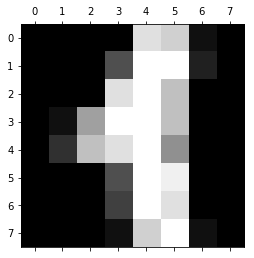

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(digits.images[11])
plt.show()

In [46]:
X = digits.data
y = digits.target

# Task 1

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

In [48]:
tree = DecisionTreeClassifier()
score = cross_val_score(tree, X, y, cv=10, n_jobs=-1).mean()
print("Score: ", score)

Score:  0.8258501280494471


In [49]:
def write_answer1(score):
    with open('answer_1.txt', 'w') as file:
        file.write(str(score))
        
write_answer1(score)

# Task 2

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bagging = BaggingClassifier(n_estimators=100, n_jobs=-1)
score = cross_val_score(bagging, X, y, cv=10, n_jobs=-1).mean()
print("Score:", score)

Score: 0.9265830325477319


In [52]:
def write_answer2(score):
    with open('answer_2.txt', 'w') as file:
        file.write(str(score))
        
write_answer2(score)

# Task 3

In [79]:
d = X.shape[1]
max_features = int(d ** 0.5)

In [80]:
bagging = BaggingClassifier(n_estimators=100, n_jobs=-1, max_features=max_features)
score = cross_val_score(bagging, X, y, cv=10, n_jobs=-1).mean()
print("Score:", score)

Score: 0.9243707892887922


In [81]:
def write_answer3(score):
    with open('answer_3.txt', 'w') as file:
        file.write(str(score))
        
write_answer3(score)

# Task 4

In [57]:
tree = DecisionTreeClassifier(max_features='sqrt')
bagging = BaggingClassifier(tree, n_estimators=100, n_jobs=-1)
score = cross_val_score(bagging, X, y, cv=10, n_jobs=-1).mean()
print("Score:", score)

Score: 0.954427797352737


In [58]:
def write_answer4(score):
    with open('answer_4.txt', 'w') as file:
        file.write(str(score))
        
write_answer4(score)

# Task 5

In [59]:
from sklearn.ensemble import RandomForestClassifier

## 1) No

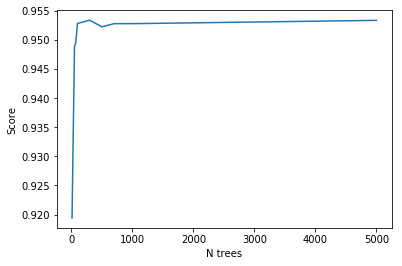

In [63]:
n_trees = [10, 50, 70, 100, 300, 500, 700, 1000, 5000]
scores = []

for n in n_trees:
    RFC = RandomForestClassifier(n_estimators=n)
    scores.append(cross_val_score(RFC, X, y, cv=10, n_jobs=-1).mean())
    
plt.plot(n_trees, scores)
plt.xlabel('N trees')
plt.ylabel('Score')
plt.show()

## 2) Yes

In [67]:
n_estimators = 15
RFC = RandomForestClassifier(n_estimators=n_estimators)
score = cross_val_score(RFC, X, y, cv=10, n_jobs=-1).mean()
print("n_estimators:", n_estimators)
print("Score:", score)

n_estimators: 15
Score: 0.9350940648918968


## 3) Yes

## 4) Yes

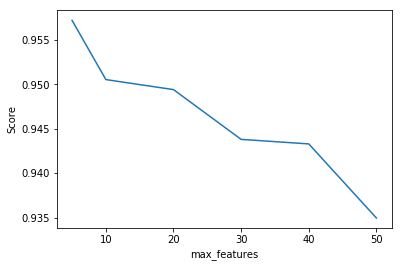

In [69]:
list_max_features = [5, 10, 20, 30, 40, 50]
scores = []

for max_features in list_max_features:
    RFC = RandomForestClassifier(n_estimators=100, max_features=max_features)
    score = cross_val_score(RFC, X, y, cv=10, n_jobs=-1).mean()
    scores.append(score)
    
plt.plot(list_max_features, scores)
plt.xlabel('max_features')
plt.ylabel('Score')
plt.show()

## 5) No

## 6) No

In [70]:
RFC = RandomForestClassifier(n_estimators=100, max_depth=5)
score = cross_val_score(RFC, X, y, cv=10, n_jobs=-1).mean()
print("Score1:", score)

RFC = RandomForestClassifier(n_estimators=100)
score = cross_val_score(RFC, X, y, cv=10, n_jobs=-1).mean()
print("Score2:", score)

Score1: 0.9170617466860568
Score2: 0.9528138353538708


## 7) Yes

In [73]:
!echo "2 3 4 7" > answer_5.txt

In [78]:
!cat answer_3.txt

0.9444022124065397